# **Car Predictor Model**

In [50]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [51]:
df = pd.read_csv('Car_Purchasing_Data.csv')
df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [52]:
# Inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [53]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


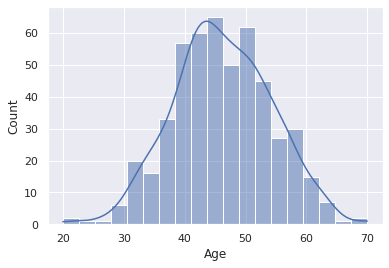

In [54]:
# Let's check if the data fits a normal distribution
sns.histplot(df, x="Age", kde=True)

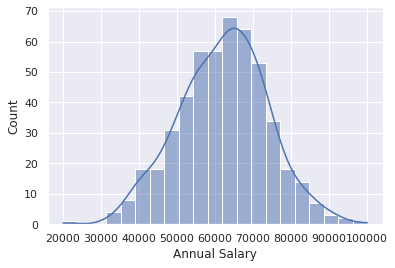

In [55]:
sns.histplot(df, x="Annual Salary", kde=True)

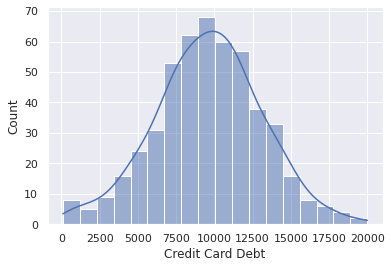

In [56]:
sns.histplot(df, x="Credit Card Debt", kde=True)

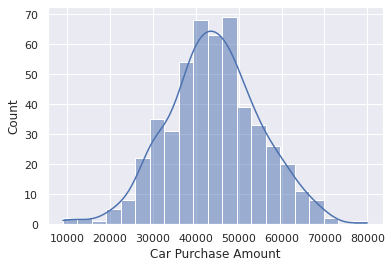

In [57]:
sns.histplot(df, x="Car Purchase Amount", kde=True)

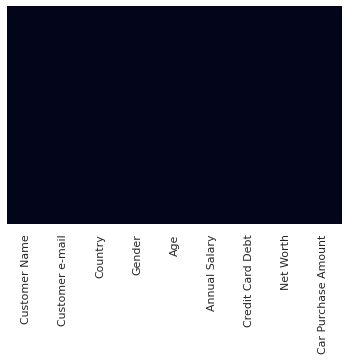

In [58]:
# Check for the null values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

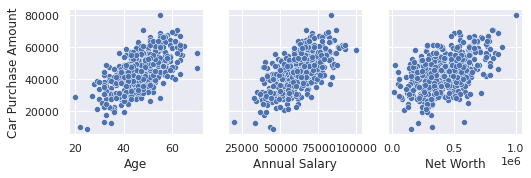

In [59]:
# Check how the car purchase amount varies with different variables
sns.pairplot(df, x_vars=['Age', 'Annual Salary', 'Net Worth'], y_vars=['Car Purchase Amount'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


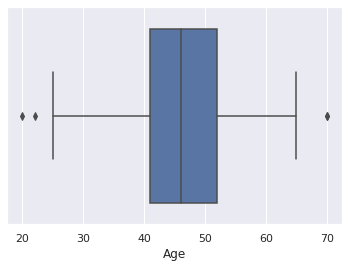

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


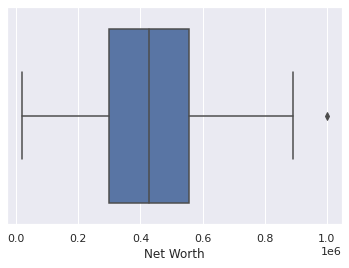

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


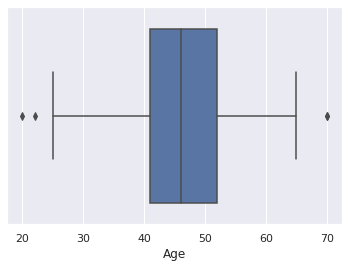

In [60]:
sns.boxplot(df['Age'])
plt.show()
sns.boxplot(df['Net Worth'])
plt.show()
sns.boxplot(df['Age'])
plt.show()

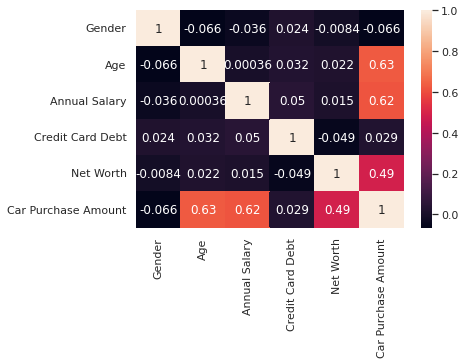

In [61]:
# Check the correlation using a heatmap
sns.heatmap(df.corr(), annot= True)

In [62]:
# Training the mode;
X = df[['Net Worth', 'Annual Salary', 'Age']]
Y = df['Car Purchase Amount']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=1)

In [63]:
# Fitting the model
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, Y_train)

LinearRegression()

In [64]:
# Checking the coefficients
regressor.coef_

array([2.89185559e-02, 5.61383043e-01, 8.40925720e+02])

In [65]:
# Checking the intercept
regressor.intercept_

-42004.592876956034

In [66]:
# Predicting values
y_pred = regressor.predict(X_train)
y_pred

array([56762.84600982, 42788.48842208, 50448.28284504, 32487.12910943,
       50600.76540164, 44330.75576924, 38268.62439132, 54602.11465713,
       40780.11239639, 30739.27723187, 42652.61592953, 49333.61926737,
       38259.01629189, 33885.09057003, 51292.24215783, 33886.37585447,
       58716.45690991, 63916.28796678, 57620.9531863 , 37948.96077629,
       55061.35669239, 42060.25465173, 48827.88705919, 35486.34554549,
       41698.50786606, 45946.41036098, 38944.31931198, 70833.64243792,
       45075.23545532, 29723.08509741, 31144.99861688, 30735.73571382,
       52981.81215999, 52555.00685994, 24529.02843432, 36383.40962658,
       27449.82954668, 46625.95701616, 32619.8667183 , 55253.95580614,
       35394.90574883, 60589.07106663, 45592.76094889, 61128.46505817,
       48301.08005259, 69980.83415205, 46197.77991818, 53594.72570068,
       42898.04192328, 37162.95433005, 32118.67858194, 31323.92111003,
       28428.31531791, 56899.84696452, 52499.89220242, 21496.7581207 ,
      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


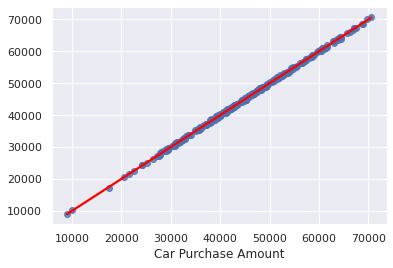

In [67]:
# PLotting the predictions
sns.set(style='darkgrid')
sns.regplot(Y_train, y_pred, line_kws={'color':'red'}, ci=None)

In [68]:
# Evaluating the model
Y_train.shape   # Returns the total

k = 3
n = 300

In [69]:
R2 = r2_score(Y_train,y_pred)
Mse = mean_squared_error(Y_train, y_pred)
RMse = np.sqrt(Mse)
Mae = mean_absolute_error(Y_train, y_pred)
adj_r2 = 1- ((1-R2)*(n-1)/(n-k-1))

In [70]:
print('R2:',R2)
print('Mean Absolute Error:',Mse)
print('RMSE:',RMse)
print('MAE:',Mae)
print('ADJ_R2:',adj_r2)

R2: 0.999485560804704
Mean Absolute Error: 59201.72299218424
RMSE: 243.3140419132941
MAE: 209.00205804237325
ADJ_R2: 0.9994803468939408


In [71]:
result = Y_train - y_pred

pred_y_table = pd.DataFrame({'Actual Value':Y_train, 'Predicted Value':y_pred, 'Difference':result})
pred_y_table

,Actual Value,Predicted Value,Difference
373,56764.44728,56762.846010,1.601270
447,42909.27129,42788.488422,120.782868
343,50188.86612,50448.282845,-259.416725
208,32478.44758,32487.129109,-8.681529
88,50937.93844,50600.765402,337.173038
...,...,...,...
255,29092.13110,29312.036695,-219.905595
72,41903.65171,42001.373008,-97.721298
396,65592.22012,65777.921275,-185.701155
235,50702.18103,51029.093195,-326.912165


In [72]:
pred_y_table.describe()

,Actual Value,Predicted Value,Difference
count,300.000000,300.000000,3.000000e+02
mean,44636.402570,44636.402570,8.670516e-12
std,10745.464194,10742.699894,2.437206e+02
min,9000.000000,8923.912564,-4.664041e+02
25%,38114.631495,38017.375726,-2.147832e+02
50%,44409.108675,44241.571268,1.401971e+01
75%,51439.881288,51361.404678,2.030347e+02
max,70598.967680,70833.642438,4.077328e+02


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


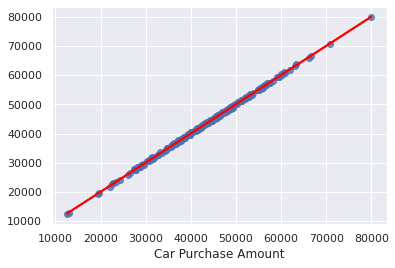

In [74]:
# Predicting on the Test set
y_pred_test = regressor.predict(X_test)

sns.set(style="darkgrid")
sns.regplot( Y_test,y_pred_test, line_kws={'color':'red'}, ci=None)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


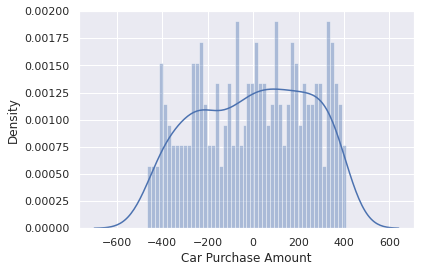

In [75]:
sns.distplot(result,50)